#  Enhancing Wi-Fi Networks with AI: A Deep Dive into Machine Learning for Wi-Fi Health Checks




### Introduction
In today's connected world, reliable Wi-Fi is crucial. But keeping it running smoothly can be tricky with all the potential issues like interference and signal drops. We're here to show you how AI, specifically supervised machine learning, can help spot and fix decrease of data ratefor a moving station. We'll walk you through how to build a model that detects performance drops in Wi-Fi networks, making network management more proactive and efficient.

Whether you're a tech expert or just curious about AI, this workshop will give you practical insights and hands-on experience. Let's dive in and explore how machine learning can make Wi-Fi better for everyone!



## Objectives
* Get Familiar with Supervised Learning: Learn the basics of supervised learning, including key concepts, algorithms, and how it's used to make predictions based on labeled data.

* Introduction to Time Series Modeling for Machine Learning: Gain a gentle introduction to time series modeling, exploring how to handle sequential data and apply it in a machine learning context.

* Apply Time Series Modeling to Detect Decreases in Data Rate: Discover practical applications by using time series modeling to identify and address drops in Wi-Fi performance, specifically focusing on detecting decreases in data rate.


## Data Generation

@Murat

### PCAP Extraction process
To extract the content of the PCAP file we used the following command:
```tshark -o 'gui.column.format:"cus.protocol","%p","Protocol","%p","cus.wlan.fc.type","%Cus:wlan.fc.type:0:R","cus.wlan.fc.type_subtype","%Cus:wlan.fc.type_subtype:0:R","cus.wlan.ssid","%Cus:wlan.ssid:0:R"' -T fields -e _ws.col.cus.protocol -e _ws.col.Protocol -e frame.protocols -e frame.number -e frame.time_epoch -e wlan.fc.type -e _ws.col.cus.wlan.fc.type -e wlan.fc.type_subtype -e _ws.col.cus.wlan.fc.type_subtype -e wlan.ssid -e _ws.col.cus.wlan.ssid -e wlan.tag -e wlan.bssid -e wlan.sa -e wlan.da -e wlan.ra -e wlan.ta -e wlan_radio.channel -e wlan_radio.signal_dbm -e wlan_radio.data_rate -e wlan.rsn.capabilities -e wlan.rsn.akms.list -e wlan.rsn.pcs.list -e wlan.qos.tid -e radiotap.channel.freq -e radiotap.dbm_antsignal -e radiotap.datarate -e wlan.addr -e wlan.seq -e wlan.fc.retry -e wlan.fc.retry.expert -e radiotap.data_retries -e wlan.duration -e wlan.qbss.cu -e radiotap.quality -e wlan_radio.signal_percentage -e wlan.fcs -e wlan.fcs.status -e wlan.fc -e wlan.fc.moredata -e frame.len -e wlan_radio.duration -e frame.cap_len -e wlan.qos.priority -e wlan.qos.ack -e wlan.qos.buf_state_indicated -e wlan_radio.noise_dbm -e tcp.analysis.ack_rtt -e tcp.analysis.lost_segment -e tcp.analysis.retransmission -e frame.time_delta -e wlan_radio.snr -e wlan.fc.more_fragments -e wlan.fixed.ssc.fragment -e wlan.fragment -e wlan.fragment.count -e wlan.fragment.error -e wlan_radio.frequency -e radiotap.present.db_antnoise -e radiotap.present.db_antsignal -e radiotap.present.dbm_antnoise -e radiotap.present.dbm_antsignal -E aggregator="$" -E separator=/t -E header=y -r 'wifi_file.pcap' -w 'output_file.csv'```


where `wifi_file.pcap` is the PCAP file and `output.csv`

### Verify runtime environment

In [1]:
try:
    import google.colab
    IN_COLAB = True
    # Load the autoreload extension for IPython
    %load_ext autoreload
    # Set the autoreload extension to reload modules every time they are imported, so that changes made to code in the src folder are reflected in the running code
    %autoreload 2

    %pip install ydata_profiling==4.8.3
    %pip install scikit-learn==1.5.0
    %pip install itables==2.1.0
    %pip install ipywidgets==8.1.2
    # %pip install Pillow==10.2.0
    %pip install numpy==1.24.1
except:
    IN_COLAB = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=fb8bd06047b8c8407d4f8a16ab7321c86003f7c305299fa2e36f405fb2134a39
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.4 MB/s eta 0:00:00
     ━━

### Import libraries

In [2]:
import os                       # Interact with the operating system
import pandas as pd             # Data analysis and manipulation
import numpy as np              # Numerical operations on arrays
import matplotlib.pyplot as plt         # Create plots
from itables import show                # To create interactive tables
from ydata_profiling import ProfileReport     # Generate data profile reports
from google.colab import drive, output        # Mount Google Drive, to load and save data to it
output.enable_custom_widget_manager()         # Enable custom widgets in Colab for profile reports


### Load the data from the folder

In [3]:
# load data from google drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/mobility'

# list the files
files = os.listdir(data_path)
files.sort()
files

Mounted at /content/drive


['file-logDistance-exp3dot5-nt-91dBm-fc3-minspeed10-maxspeed20-area1600-testhttp_load.pcap.csv',
 'file-logDistance-exp3dot5-nt-91dBm-fc3-minspeed10-maxspeed20-area3600-testhttp_load.pcap.csv',
 'file-logDistance-exp3dot5-nt-91dBm-fc3-minspeed10-maxspeed20-area6400-testhttp_load.pcap.csv',
 'file-logDistance-exp3dot5-nt-91dBm-fc3-minspeed20-maxspeed40-area1600-testhttp_load.pcap.csv',
 'file-logDistance-exp3dot5-nt-91dBm-fc3-minspeed20-maxspeed40-area3600-testhttp_load.pcap.csv',
 'file-logDistance-exp3dot5-nt-91dBm-fc3-minspeed20-maxspeed40-area6400-testhttp_load.pcap.csv',
 'file-logDistance-exp3dot5-nt-91dBm-fc3-minspeed40-maxspeed80-area1600-testhttp_load.pcap.csv',
 'file-logDistance-exp3dot5-nt-91dBm-fc3-minspeed40-maxspeed80-area3600-testhttp_load.pcap.csv',
 'file-logDistance-exp3dot5-nt-91dBm-fc3-minspeed40-maxspeed80-area6400-testhttp_load.pcap.csv',
 'file-logDistance-exp4dot5-nt-91dBm-fc3-minspeed10-maxspeed20-area1600-testhttp_load.pcap.csv',
 'file-logDistance-exp4dot5-nt

In [4]:
# choose the file from a dropdown list inside the notebook
from ipywidgets import interact
df = None
def load_file(file):
    """
    Load the file into a dataframe and display the info
    """
    global df
    file_path = os.path.join(data_path, file)
    df = pd.read_csv(file_path)
    return df.info()

interact(load_file, file=files)


interactive(children=(Dropdown(description='file', options=('file-logDistance-exp3dot5-nt-91dBm-fc3-minspeed10…

<function __main__.load_file(file)>

## Functions to preprocess the data
For each file we will:
* remove the empty columns
* change epoch times ('frame_time_epoch') to timestamps
* filter the rows with specific source address and keep only data frames
* index the file by the timestamps

In [5]:
# function to convert epoch times to datetime
def convert_epoch_to_datetime(df):
    df['timestamps'] = pd.to_datetime(df['frame_time_epoch'], unit='s')
    return df

# function to select frames with 'wlan_fc_type' == 2 and 'wlan_sa' is not 'source_address'
def select_frames(df, source_address):
    return df[(df['wlan_fc_type'] == 2) & (df['wlan_sa'] != source_address)]  # Is this the right way?

# function to remove empty columns
def remove_empty_columns(df):
    return df.dropna(axis=1, how='all')

def preprocess(df, source_address):
    res = convert_epoch_to_datetime(df)
    res = select_frames(res,source_address)
    res = remove_empty_columns(res)
    return res

In [6]:
%%time
# Lets apply the preprocessing function to the df we created earlier
source_address = '00:00:00:00:00:02'  #this is the client address. we don't want packets where it is the source address
df = preprocess(df, source_address)
df.info()       # check the column names and their data types


<class 'pandas.core.frame.DataFrame'>
Index: 3881 entries, 4857 to 9107
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   _ws_col_cus_protocol              3881 non-null   object        
 1   _ws_col_protocol                  3881 non-null   object        
 2   frame_protocols                   3881 non-null   object        
 3   frame_number                      3881 non-null   int64         
 4   frame_time_epoch                  3881 non-null   float64       
 5   wlan_fc_type                      3881 non-null   int64         
 6   _ws_col_cus_wlan_fc_type          3881 non-null   object        
 7   wlan_fc_type_subtype              3881 non-null   object        
 8   _ws_col_cus_wlan_fc_type_subtype  3881 non-null   object        
 9   wlan_bssid                        3881 non-null   object        
 10  wlan_sa                           3881 non-null   

### Some Observations
- The number of columns have been reduced
- The 'timestamps' column is added at the end
- The number of rows reduced

In [7]:
%%time

# # Let us now analyze the data statistically using ydata_profiling library
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# # we can save the analysis in the drive
# profile.to_file('/content/drive/MyDrive/analysis_report.html')


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


### Function to resample the data

The Objective is to resample the data to a specific time interval.

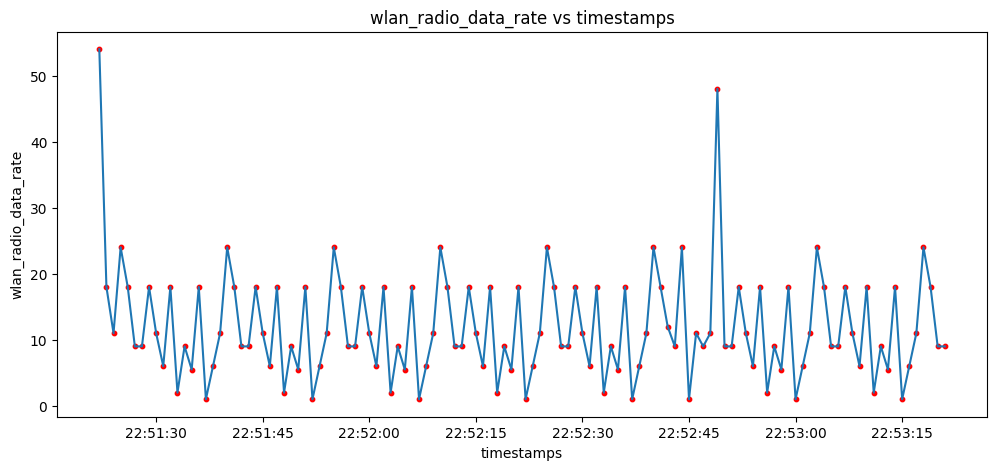

In [8]:
# create a function which also takes sampling time as input
def resample_file(df, step_size):

    # if the columns exists, set index, if not, it has already been set
    if 'timestamps' in df.columns:
        df.set_index('timestamps', inplace=True)    #set index to timestamps

    #resample data and fill missing values with previous values
    df = df.resample(f'{step_size}s').ffill()

    # with ffil, the first row is NaN, so we drop it
    df = df.dropna(how = 'all')

    return df


# Test the function, resample the data and plot to analyze
step_size = 1
resampled_df = resample_file(df, step_size)

# Let's plot the 'wlan_radio_data_rate' vs timestamps
plt.figure(figsize=(12, 5))
plt.plot(resampled_df.index, resampled_df['wlan_radio_data_rate'])
plt.scatter(resampled_df.index, resampled_df['wlan_radio_data_rate'], color='red', s=10)
plt.xlabel('timestamps')
plt.ylabel('wlan_radio_data_rate')
plt.title('wlan_radio_data_rate vs timestamps')
plt.show()


## Feature Creation
The idea is to create a set of features using the past history of the data. We will use our variable of interest `wlan_radio_datarate` and its past values to create the features.

In [9]:
# create a function to create features from the 'wlan_radio_data_rate' column
def create_features(df, past_history_sec):

    # convert past_history from seconds to number of samples, based on the resampling time
    past_history_samples = int(past_history_sec / step_size)

    for i in range(1, past_history_samples+1):

        df[f'data_rate_lag_{i}'] = df['wlan_radio_data_rate'].shift(i)

    # remove initial rows with NaN values in the new columns
    df = df.iloc[past_history_samples:]

    return df

# Test the function, create features and plot to analyze
past_history_sec = 7  #s, *times the resampling time

df = create_features(resampled_df, past_history_sec)
show(df)

In [10]:
# profile2 = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# # we can even save it to a file
# profile2.to_file('/content/drive/MyDrive/analysis_report2.html')

# Lets do all of the above steps on all the files in the folder in a loop and then save the results in a big dataframe

In [11]:
df_complete = pd.DataFrame()

# fix the step size and past history
step_size = 1
past_history = 15

past_history_samples = int(past_history_sec / step_size)

for file in files:
    file_path = os.path.join(data_path, file)
    df = pd.read_csv(file_path)
    df = preprocess(df, source_address)
    df = resample_file(df, step_size)

    df = create_features(df, past_history)

    df_complete = pd.concat([df_complete, df])

show(df_complete)

## Model Development

<img src="../assets/ml_process.jpg">


### Select features and split the data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# select the 'wlan_radio_data_rate' as features and its lags equal to 'past_history_samples' as features
features = [f'data_rate_lag_{i}' for i in range(1, past_history_samples+1)]
features.append('wlan_radio_data_rate')
# print(features)

target = 'label'

X = df_complete[features]
y = df_complete[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=20,
                                                    shuffle=False
                                                    )

#  random forest classifier
rf = RandomForestClassifier(
                            class_weight= 'balanced',
                            random_state=20
                            )
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

## Evaluation of the model

### Confusion matrix
<img src="../assets/confusion_matrix.png">

### Evaluation Metrics

<img src="../assets/precision_recall.jpg">


Overall accuracy', 0.831
Precision: 0.565
Recall: 0.897
F1: 0.693
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       427
         1.0       0.57      0.90      0.69       116

    accuracy                           0.83       543
   macro avg       0.77      0.85      0.79       543
weighted avg       0.88      0.83      0.84       543



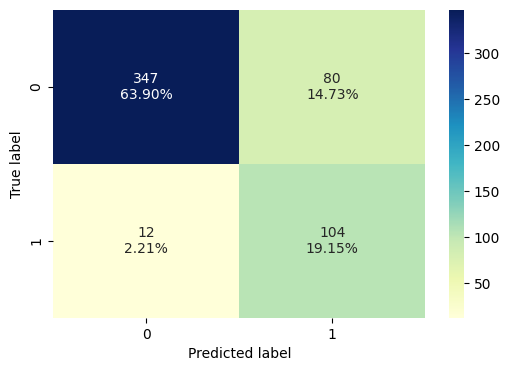

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(y_test, y_predict):

    print("Overall accuracy', %.3f" %accuracy_score(y_test, y_predict))
    precision = precision_score(y_test, y_predict)
    print('Precision: %.3f' % precision)

    recall = recall_score(y_test, y_predict)
    print('Recall: %.3f' % recall)

    f1 = f1_score(y_test, y_predict, average='binary')
    print('F1: %.3f' % f1)

    print("CLASSIFICATION REPORT")
    print(classification_report(y_test, y_predict))

    cm = confusion_matrix(y_test, y_predict)

    labels = np.asarray(
        [ ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten() ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="YlGnBu")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# call the function
evaluate_model(y_test, y_pred)

## Improving accuracy

The idea is to use the classification threshold that minimizes the difference between precision and recall

Best threshold: 0.6500000000000001
Overall accuracy', 0.923
Precision: 0.819
Recall: 0.819
F1: 0.819
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       427
         1.0       0.82      0.82      0.82       116

    accuracy                           0.92       543
   macro avg       0.88      0.88      0.88       543
weighted avg       0.92      0.92      0.92       543



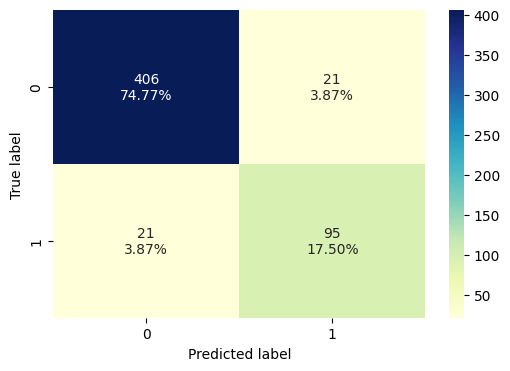

In [14]:
# Find the best threshold for the model

from sklearn.model_selection import FixedThresholdClassifier

thresholds = np.arange(0.1, 0.95, 0.05)

def find_best_threshold(classifier, X_train, y_train, X_test, y_test, thresholds):

    results = []

    for threshold in thresholds:
        rf_improved = FixedThresholdClassifier(classifier, threshold=threshold)
        y_pred = rf_improved.fit(X_train, y_train).predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='binary')

        # if any of the precision or recall is zero, skip the threshold.
        # sklearn sets them to zero when their denominator is zero

        if precision == 0 or recall == 0:
            continue

        results.append([threshold, precision, recall, f1])

    results = pd.DataFrame(results, columns=['threshold', 'precision', 'recall', 'f1_score'])
    results['diff_pre_rec'] = abs(results['precision'] - results['recall'])

    # find the threshold with the minimum difference between precision and recall
    best_threshold = results.loc[results['diff_pre_rec'].idxmin()]

    # train the model with the best threshold and return it
    best_model = FixedThresholdClassifier(classifier, threshold=best_threshold['threshold'])

    return best_threshold, best_model


# Call the function
best_threshold, best_model = find_best_threshold(rf, X_train, y_train, X_test, y_test, thresholds)
print('Best threshold:', best_threshold['threshold'])
best_model.fit(X_train, y_train)

# Evaluate the model with the best threshold
y_pred = best_model.predict(X_test)
evaluate_model(y_test, y_pred)


## Can we further improve the model?

Q1: How often should we make predictions (variable `step_size`)? \
Q2: How many past samples should we use to make predictions (variable `past_history`)?

In [15]:
step_size_vals = [1, 2, 3, 5]
past_history_vals = [5, 10, 15, 20, 25]

final_results = []

for step_size in step_size_vals:

    for past_history in past_history_vals:

        print(f'Resampling time: {step_size}, Window size: {past_history}...')

        # if the window size is less than the resampling time, skip the iteration
        if past_history < step_size:
            continue

        past_history_samples = int(past_history / step_size)

        wifi_data = pd.DataFrame()

        for file in files:
            file_path = os.path.join(data_path, file)
            df = pd.read_csv(file_path)
            df = preprocess(df, source_address)
            df = resample_file(df, step_size)

            df = create_features(df, past_history)

            wifi_data = pd.concat([wifi_data, df])

        # select the wlan_radio_data_rate as features and its lags equal to past_history_samples as features
        features = [f'data_rate_lag_{i}' for i in range(1, past_history_samples+1)]
        features.append('wlan_radio_data_rate')

        X = wifi_data[features]
        y = wifi_data[target]

        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=0.2,
                                                            random_state=10,
                                                            shuffle=False
                                                            )

        model = RandomForestClassifier(class_weight= 'balanced',
                                    random_state=20
                                    )
        model.fit(X_train, y_train)

        # finding an optimal threshold value for the model
        best_threshold, best_model = find_best_threshold(model, X_train, y_train, X_test, y_test, thresholds)

        # select the best model metrics and store them
        precision = best_threshold['precision']
        recall = best_threshold['recall']
        f1 = best_threshold['f1_score']

        final_results.append([step_size, past_history, precision, recall, f1, model])

final_results = pd.DataFrame(final_results, columns=['step_size', 'past_history', 'precision', 'recall', 'f1_score', 'model'])


Resampling time: 1, Window size: 5...
Resampling time: 1, Window size: 10...
Resampling time: 1, Window size: 15...
Resampling time: 1, Window size: 20...
Resampling time: 1, Window size: 25...
Resampling time: 2, Window size: 5...
Resampling time: 2, Window size: 10...
Resampling time: 2, Window size: 15...
Resampling time: 2, Window size: 20...
Resampling time: 2, Window size: 25...
Resampling time: 3, Window size: 5...
Resampling time: 3, Window size: 10...
Resampling time: 3, Window size: 15...
Resampling time: 3, Window size: 20...
Resampling time: 3, Window size: 25...
Resampling time: 5, Window size: 5...
Resampling time: 5, Window size: 10...
Resampling time: 5, Window size: 15...
Resampling time: 5, Window size: 20...
Resampling time: 5, Window size: 25...


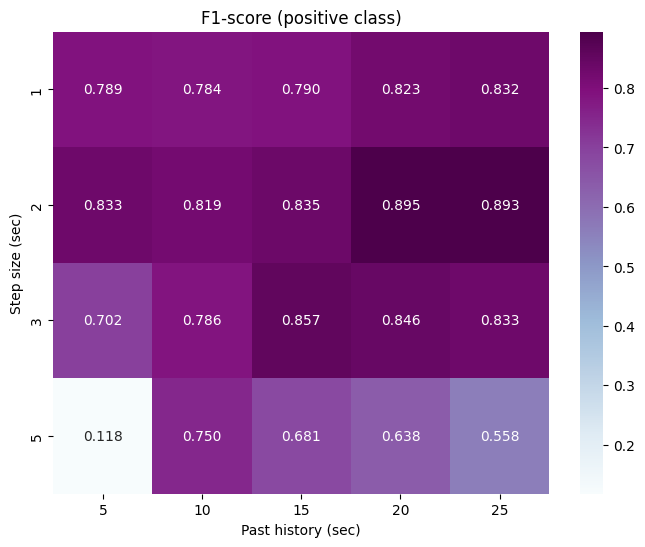

In [16]:
df_plot = final_results.pivot(index='step_size', columns='past_history', values='f1_score')

plt.figure(figsize=(8, 6))
sns.heatmap(df_plot, annot=True, fmt=".3f", cmap="BuPu")
plt.ylabel("Step size (sec)")
plt.xlabel("Past history (sec)")
plt.title("F1-score (positive class)")
plt.show()

<!-- take examples.  -->


<ipython-input-42-3bbee897d0b2>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(X_test.columns, rotation=45)


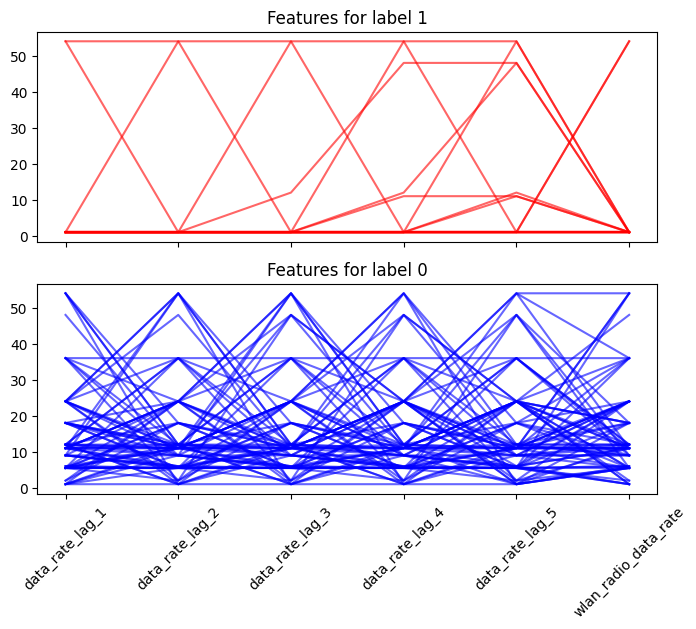

In [42]:
# choose some positive class indices from the test set and some negative class indices
positive_indices = y_test[y_test == 1].index
negative_indices = y_test[y_test == 0].index

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
# Plot positive_indices in red
axs[0].plot(X_test.loc[positive_indices].T, 'r', alpha=0.6)
axs[0].set_title('Features for label 1')
axs[0].set_xticklabels([])

# Plot negative_indices in blue
axs[1].plot(X_test.loc[negative_indices].T, 'b', alpha=0.6)
axs[1].set_title('Features for label 0')
axs[1].set_xticklabels(X_test.columns, rotation=45)

plt.show()


In [44]:
# # plot feature importance
# importances = best_model.feature_importances_
# indices = np.argsort(importances)[::-1]

# plt.figure(figsize=(6, 4))
# plt.bar(range(X_train.shape[1]), importances[indices])
# plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
# plt.title("Feature importance")
# plt.show()

AttributeError: 'FixedThresholdClassifier' object has no attribute 'feature_importances_'